### Support Vector Regression on Detector-1 dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../Data_Files/Processsed data/det1.csv')
df.head(10)

,TIME,AMP,HV,LLD,COUNT
0,10.0,1.2,701.000000,0.6,546.300000
1,10.0,1.2,750.000000,0.6,223.633333
2,10.0,1.2,800.066667,0.6,227.233333
3,10.0,1.2,850.000000,0.6,209.300000
4,10.0,1.2,900.000000,0.6,251.266667
5,10.0,1.2,601.000000,0.8,608.633333
6,10.0,1.2,651.000000,0.8,737.200000
7,10.0,1.2,701.000000,0.8,671.600000
8,10.0,1.2,750.000000,0.8,379.200000
9,10.0,1.2,800.000000,0.8,181.866667


In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

### Scaling the data

In [5]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Building the  model

In [7]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)

SVR()

In [10]:
y_pred = []
#for x in X_test:
#    y_pred.append(sc_y.inverse_transform(regressor.predict([x])))
y_pred = sc_y.inverse_transform(regressor.predict(X_test))

### Coeff of determination

In [11]:
regressor.score(X_test,y_test)

0.9070191730295385

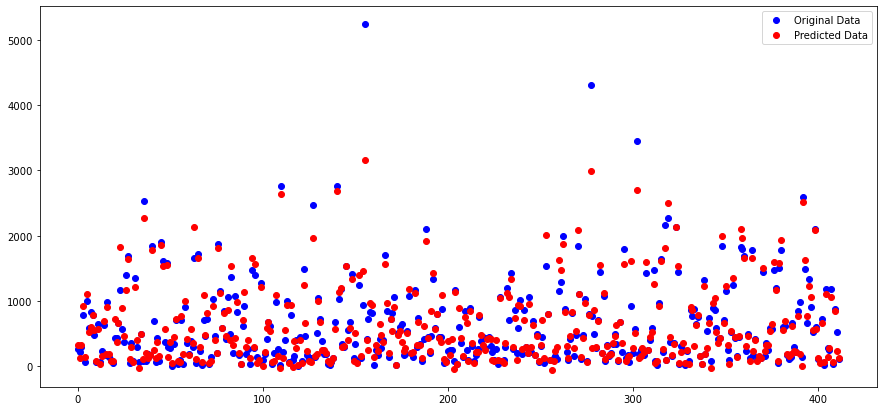

In [12]:
plt.figure(figsize=(15,7))
plt.plot(sc_y.inverse_transform(y_test),'bo')
plt.plot(y_pred,'ro')
plt.legend(['Original Data','Predicted Data'])